In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np # linear algebra
import matplotlib as mpl
import matplotlib.cm as cm
from subprocess import check_output
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# To load the dataset, put the data into a directory
data = pd.read_csv("../input/data.csv")

# we need to display all the columns in the dataframe, because there are many columns in the data set.
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head)
print(data.describe())

# Data cleaning, delete the "id" column
data = data.drop(['id', 'Unnamed: 32'],axis=1)
# Replace B beign with 0 and M beign with 1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data_X = data.drop('diagnosis',axis=1)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          13

In [105]:
 # We will describe all data
data.describe() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


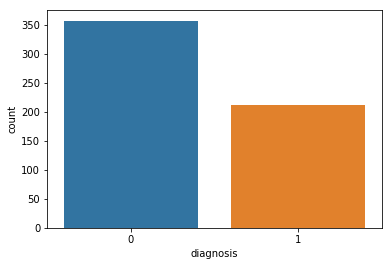

In [106]:
# Visualizing diagnostic results
sns.countplot(data['diagnosis'],label="Count")
plt.show()

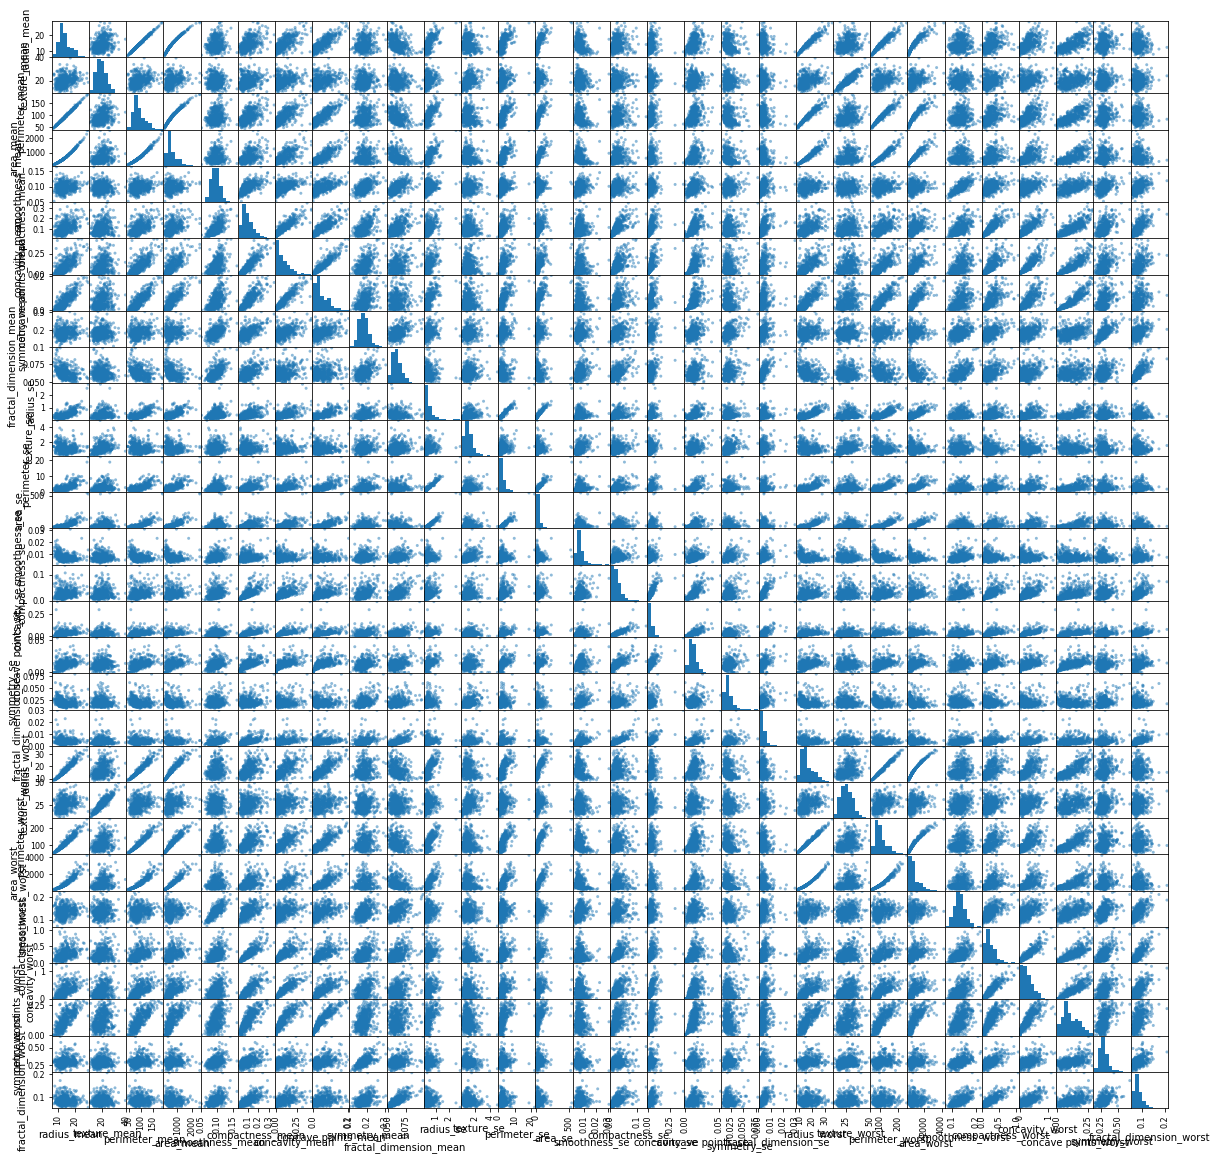

In [107]:
#  Create scatter plot matrix
scatter_matrix(data_X,figsize = (20,20))
plt.show()

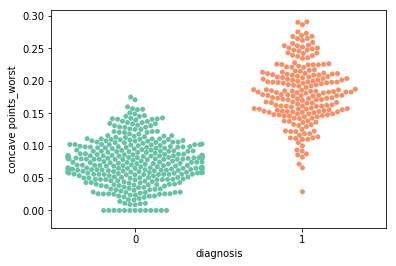

In [108]:
sns.swarmplot(x = 'diagnosis', y = 'concave points_worst',palette = 'Set2', data = data);

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


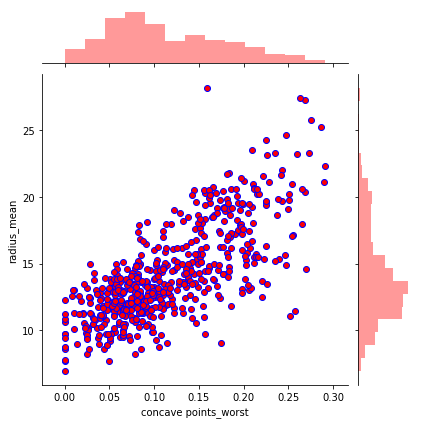

In [109]:
sns.jointplot(x = data['concave points_worst'], y = data['radius_mean'], stat_func=None, color="red", edgecolor = 'blue', size = 6);

In [110]:
# Feature selection
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 
# Divided the 30%of whole data set as the test set, the rest as the train set
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# Train and test
train_X = train[features_remain]
train_y=train['diagnosis']
test_X= test[features_remain]
test_y =test['diagnosis']

# Using Z-Score to normalize data
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)



First model is SVM

In [111]:
# Create SVM Model
model = svm.SVC()
# Using the train sets to train
model.fit(train_X,train_y)
# Using the test sets to predict
prediction=model.predict(test_X)
#pred_y = svc.fit(train_X,train_y).predict(test_X)
print('ACC: ', metrics.accuracy_score(prediction,test_y))
#print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,test_y))

ACC:  0.9415204678362573


The second method we use is Random Forest.

In [112]:
# a simple random forest model
model=RandomForestClassifier(5)
#model=RandomForestClassifier(n_estimators=10)# a simple random forest model
# Fit our model for training data
model.fit(train_X,train_y)
# predict for the test data
prediction=model.predict(test_X)# predict for the test data
 # to check the accuracy
print('ACC: ', metrics.accuracy_score(prediction,test_y)) 

ACC:  0.9181286549707602


> The third method we use is KNN

In [113]:
scores = []
#for each in range(1,32):
model = KNeighborsClassifier()
model.fit(train_X,train_y)#now fit our model for traiing data
scores.append(model.score(test_X,test_y))
prediction=model.predict(test_X)
    #model = KNeighborsClassifier(n_neighbors = each)# a simple KNN model
    #model.fit(train_X,train_y)#now fit our model for traiing data
    #scores.append(model.score(test_X,test_y))
    #prediction=model.predict(test_X)
print('ACC: ', metrics.accuracy_score(prediction,test_y)) # to check the accuracy
#print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,test_y))

ACC:  0.9239766081871345


Finally, we use Deep Learning. 

In [114]:
# Create a feed forward neural network with 3 hidden layers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input 
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(128,activation="relu",input_dim = np.shape(train_X)[1]))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# divide the data to training is 70%, for the validation is 30%
model.fit( train_X, train_y,batch_size=5, epochs=50,validation_split=0.3)

Train on 278 samples, validate on 120 samples
Epoch 1/50
278/278 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.7158 - val_loss: 0.3150 - val_accuracy: 0.8667
Epoch 2/50
278/278 [==============================] - 0s 393us/step - loss: 0.2707 - accuracy: 0.9029 - val_loss: 0.2037 - val_accuracy: 0.9167
Epoch 3/50
278/278 [==============================] - 0s 387us/step - loss: 0.2070 - accuracy: 0.9173 - val_loss: 0.2091 - val_accuracy: 0.9250
Epoch 4/50
278/278 [==============================] - 0s 390us/step - loss: 0.1735 - accuracy: 0.9424 - val_loss: 0.2102 - val_accuracy: 0.9250
Epoch 5/50
278/278 [==============================] - 0s 399us/step - loss: 0.1720 - accuracy: 0.9281 - val_loss: 0.1926 - val_accuracy: 0.9333
Epoch 6/50
278/278 [==============================] - 0s 398us/step - loss: 0.1897 - accuracy: 0.9245 - val_loss: 0.2016 - val_accuracy: 0.9250
Epoch 7/50
278/278 [==============================] - 0s 403us/step - loss: 0.1668 - accurac

In [115]:
# validation analysis 
from sklearn.model_selection import StratifiedKFold
seed = 3
np.random.seed(seed)
#cross validation (k=2)
k = 2
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
cvscores = []
#Y = data_scale['diagnosis']
for train, test in kfold.split(test_X,test_y):
    # Fit the model
    model.fit(test_X,test_y, epochs=10, batch_size=10, verbose=0)
    # Evaluation of the model
    scores = model.evaluate(test_X,test_y, verbose=0)
    cvscores.append(scores[1] )
    
print('ACC: ', np.mean(cvscores))

ACC:  0.9736842215061188
